# Data Project - Stock Market Analysis


Data from the stock market, particularly some technology stocks. Used pandas to get stock information, visualize different aspects of it, and finally I will look at a few ways of analyzing the risk of a stock, based on its previous performance history. I will also try to predict future stock prices through a Monte Carlo method!

1.) What was the change in price of the stock over time?                      
2.) What was the daily return of the stock on average?                            
3.) What was the moving average of the various stocks?              
4.) What was the correlation between different stocks' closing prices?                    
5.) What was the correlation between different stocks' daily returns?             
6.) How much value do we put at risk by investing in a particular stock?            
7.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

In [4]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

In [5]:
# For time stamps
from datetime import datetime

In [6]:
stock_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [7]:
start_date = "6 september, 2018"
end_date = "6 september, 2019"

In [8]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stocks in stock_list:
    globals()[stocks] = DataReader(stocks, data_source="yahoo", start=start_date, end = end_date)

In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-06,227.350006,221.300003,226.229996,223.100006,34290000.0,219.690903
2018-09-07,225.369995,220.710007,221.850006,221.300003,37619800.0,217.918411
2018-09-10,221.850006,216.470001,220.949997,218.330002,39516500.0,214.993759
2018-09-11,224.300003,216.559998,218.009995,223.850006,35749000.0,220.429443
2018-09-12,225.000000,219.839996,224.940002,221.070007,49278700.0,217.691925


In [11]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.396151,190.329008,192.345913,192.355635,3.261178e+07,190.732274
std,21.315958,21.035567,21.170425,21.095627,1.389681e+07,20.884102
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.291840e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.970625e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.883658e+07,206.560455
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [12]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-09-06 to 2019-09-06
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


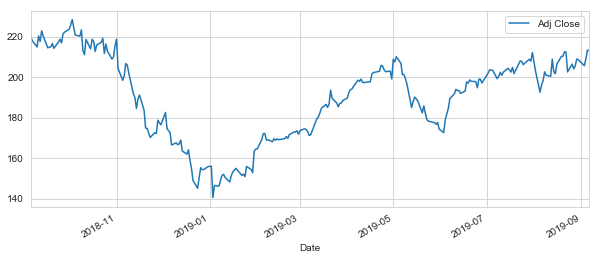

In [13]:
# A historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

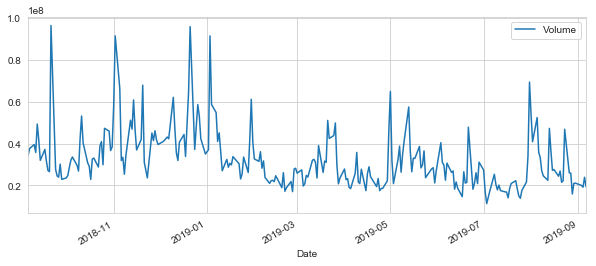

In [14]:
# Now let's plot the total volume of stock being traded each day over the past 1 year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
#Calculate the moving average for the stock.
ma_list = [5, 10, 20, 50]

for ma in ma_list:
    column = f" MA for {ma} days"
    AAPL[column] = AAPL['Adj Close'].rolling(window=ma).mean()

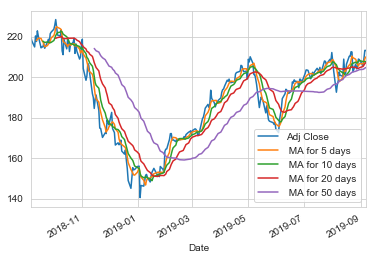

In [17]:
# plotting all the additional Moving Averages
AAPL[["Adj Close", " MA for 5 days", " MA for 10 days", " MA for 20 days", " MA for 50 days"]].plot()

# To see the Daily Returns on each stock

In [18]:
# pct_change to find the percent change for each day
AAPL["Daily Returns"] = AAPL["Adj Close"].pct_change() 

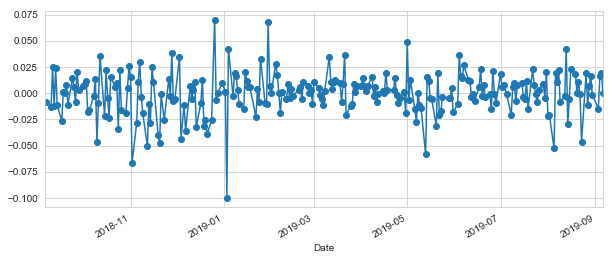

In [19]:
AAPL["Daily Returns"].plot(figsize = (10,4), marker = "o", kind = "line")

# To see Average Daily Return using Seaborn

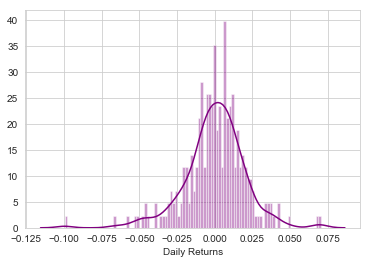

In [20]:
# geting an overall look at the average daily return using a histogram 
sns.distplot(AAPL["Daily Returns"].dropna(), bins = 100, color = "purple")

To analyze the returns of all the stocks in our list building a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing = DataFrame()
techi_list = [AAPL,GOOG,MSFT,AMZN]
x = 0

for i in techi_list:
    closing[x] = i["Close"]
    x = x+1

In [22]:
closing.head(3)

,0,1,2,3
Date,,,,
2018-09-06,223.100006,1171.439941,108.739998,1958.310059
2018-09-07,221.300003,1164.829956,108.209999,1952.069946
2018-09-10,218.330002,1164.640015,109.379997,1939.010010


In [23]:
closing.rename(columns = {0 : "AAPL", 1:"GOOG", 2:"MSFT", 3:"AMZN"}, inplace=True)

In [24]:
techi_rets = closing.pct_change()

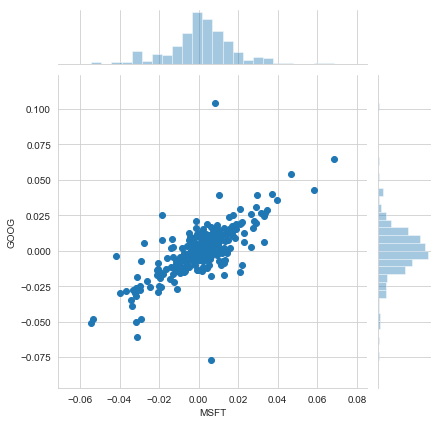

In [25]:
sns.jointplot(x = "MSFT", y = "GOOG", data = techi_rets)

In [81]:
# That was comparison between two of the stocks 
# But what if you wanna compare all of them together at the same time

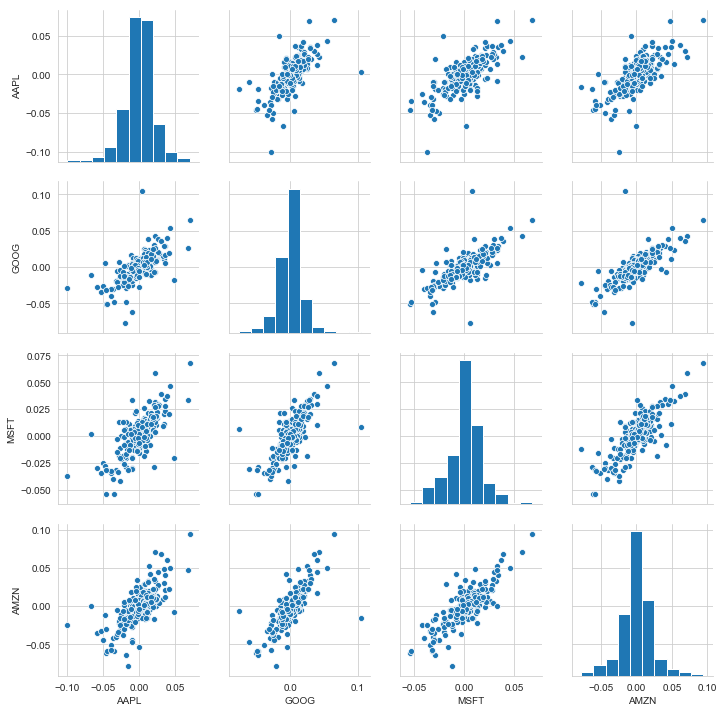

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(techi_rets.dropna(), palette="winter")

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows interesting correlations between almost all the stocks. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

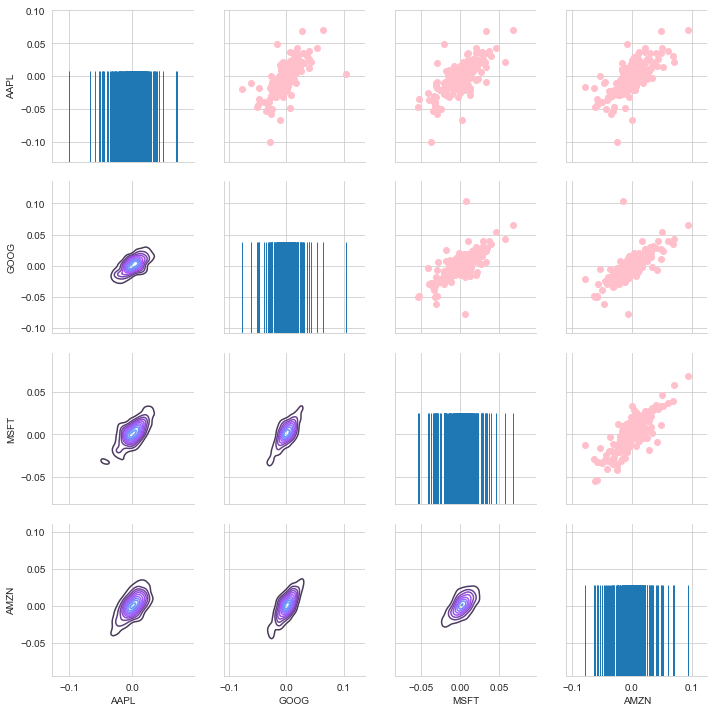

In [31]:
# Set up the figure by naming it "figure", call PairGrid on the DataFrame
figure = sns.PairGrid(techi_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like
figure.map_upper(plt.scatter, color = "pink")

# Using map_lower we can specify what the lower triangle will look like.
figure.map_lower(sns.kdeplot, cmap = "cool_d")

# Using map_diag we can specify what the diagnoal triangle will look like.
figure.map_diag(sns.rugplot, height = 0.6)


Now I will try to get the numerical values of the correlation as well to get the clear picture as all of the plots above seem closely correlated with one another

In [79]:
# Having a look on the Dataframe with values
corr = techi_rets.dropna().corr()
corr

,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.659196,0.717146,0.706839
GOOG,0.659196,1.000000,0.722992,0.740664
MSFT,0.717146,0.722992,1.000000,0.806148
AMZN,0.706839,0.740664,0.806148,1.000000


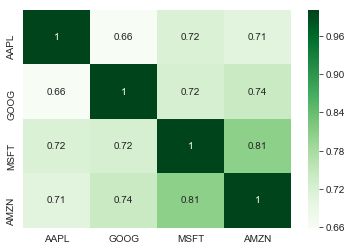

In [77]:
# Visualize it using heatmap
sns.heatmap(corr, annot = True, cmap="Greens")

#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")

As we saw in the previous plots that almost all the stocks seem to closely correlated with each other, the same thing can be verified from these values

Trying to do the similar operations with the closing values of the stocks 

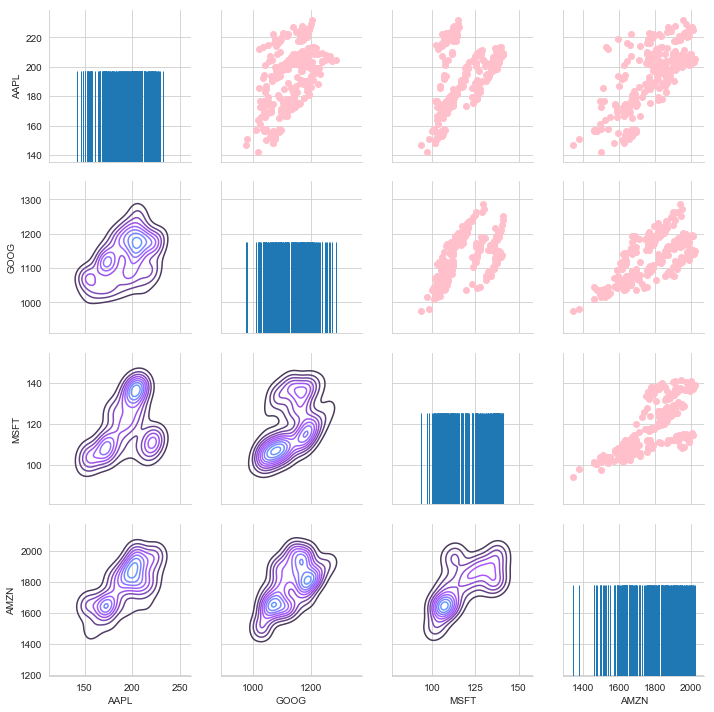

In [81]:
# Set up the figure by naming it "figure", call PairGrid on the DataFrame
figure = sns.PairGrid(closing.dropna())

# Using map_upper we can specify what the upper triangle will look like
figure.map_upper(plt.scatter, color = "pink")

# Using map_lower we can specify what the lower triangle will look like.
figure.map_lower(sns.kdeplot, cmap = "cool_d")

# Using map_diag we can specify what the diagnoal triangle will look like.
figure.map_diag(sns.rugplot, height = 0.6)

The plots above have data bit more spreaded than what we saw in the previous plots. Let's try to figure out using .corr() method

In [82]:
# A quick look on the dataframe
corr_2 = closing.dropna().corr()
corr_2

,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.528138,0.461670,0.722790
GOOG,0.528138,1.000000,0.542348,0.670834
MSFT,0.461670,0.542348,1.000000,0.709494
AMZN,0.722790,0.670834,0.709494,1.000000


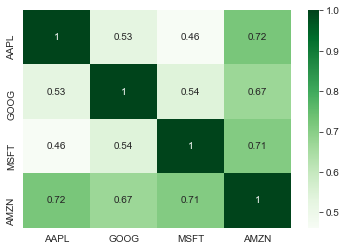

In [83]:
# Visualize it using heatmap
sns.heatmap(corr_2, annot = True, cmap="Greens")

We can see that Amazon-Microsoft and Amzon-Apple do have good correlation but others aint that close

# Risk Analysis

There are many ways to quantify the risk, one of the most basic ways using the information I have gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns

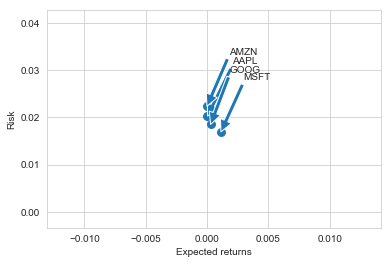

In [103]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = techi_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(),alpha = 1,s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

## Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict())

The stock which has high expected returns and less risk should be always selected...Here all the stocks are almost very stable so nothing wrong for going any of these stocks but if specific out of these 4 than of course Microsoft

# Value at Risk

Value at risk parameter for the stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval

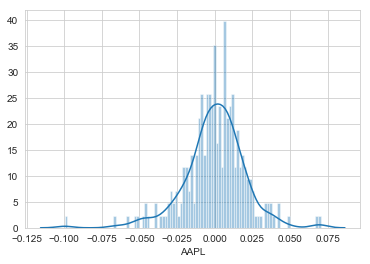

In [106]:
#Value at risk using the "bootstrap" method
#For this method we will calculate the empirical quantiles from a histogram of daily returns
sns.distplot(techi_rets["AAPL"].dropna(), bins = 100)

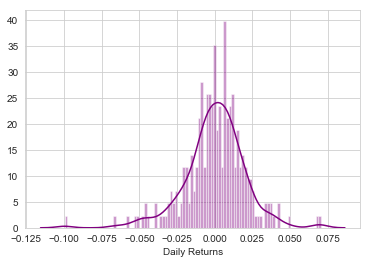

In [109]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')

In [110]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03314964328030057

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.033 * 1,000,000 = $33,000.

In [111]:
rets['GOOG'].quantile(0.05)

-0.028087575159052636

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000.

In [112]:
rets['MSFT'].quantile(0.05)

-0.031147513208146127

The 0.05 empirical quantile of daily returns is at -0.031. That means that with 95% confidence, our worst daily loss will not exceed 3.1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.031 * 1,000,000 = $31,000.

In [113]:
rets['AMZN'].quantile(0.05)

-0.03891514947263236

The 0.05 empirical quantile of daily returns is at -0.039. That means that with 95% confidence, our worst daily loss will not exceed 3.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.033 * 1,000,000 = $39,000.

Let's now look at value at risk by implementing a Monte Carlo method.

In [114]:
# Set up time horizon
days = 365

# Now time delta
dt = 1/days

# Now let's grab mu (drift) from the expected return data we got for AAPL
mu = techi_rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = techi_rets.std()['GOOG']

In [115]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

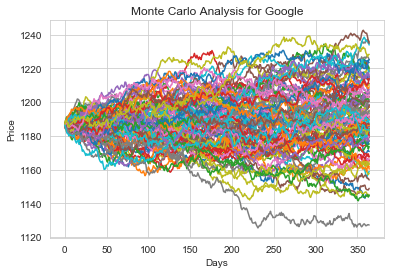

In [116]:
start_price = 1186.30

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [117]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365')

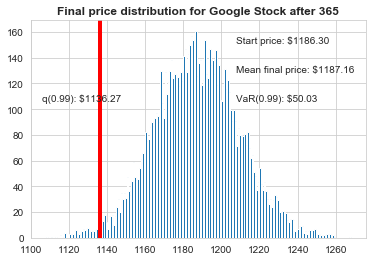

In [118]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(f"Final price distribution for Google Stock after {days}", weight='bold')

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $50.03 for every investment of 1186.30 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $50.03 at risk 99% of the time from our Monte Carlo Simulation.